In [2]:
import pandas as pd
import numpy as np

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers, models, optimizers

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / mean

In [9]:
def build_model_regression(lr_var, input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.RMSprop(lr=lr_var), loss='mse', metrics=['mae'])
    return model

In [10]:
k = 4
num_val_samples = len(train_data) // 4
num_epoch = 80
all_history = []

In [11]:
for i in range(k):
    print('Fold:', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [
            train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]
        ],
        axis=0
    )
    
    partial_train_targets = np.concatenate(
        [
            train_labels[:i * num_val_samples],
            train_labels[(i + 1) * num_val_samples:]
        ],
        axis=0
    )
    
    model = build_model_regression(0.001, 13)
    history = model.fit(
        partial_train_data,
        partial_train_targets, 
        epochs=num_epoch,
        batch_size=16,
        validation_data=(val_data, val_targets),
        verbose=0
    )
    
    all_history.append(history.history['val_mae'])

Fold: 0


2021-09-03 09:33:00.437774: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-03 09:33:00.439011: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-03 09:33:00.442188: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-09-03 09:33:00.577884: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-03 09:33:00.599605: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2901210000 Hz


Fold: 1
Fold: 2
Fold: 3


In [14]:
len(all_history[1])

80

In [15]:
all_mean_avg = pd.DataFrame(all_history).mean(axis=0)

In [16]:
all_mean_avg

0     19.593478
1     16.254734
2     12.171692
3      8.315497
4      6.175887
        ...    
75     2.388638
76     2.431572
77     2.420207
78     2.404029
79     2.439632
Length: 80, dtype: float64

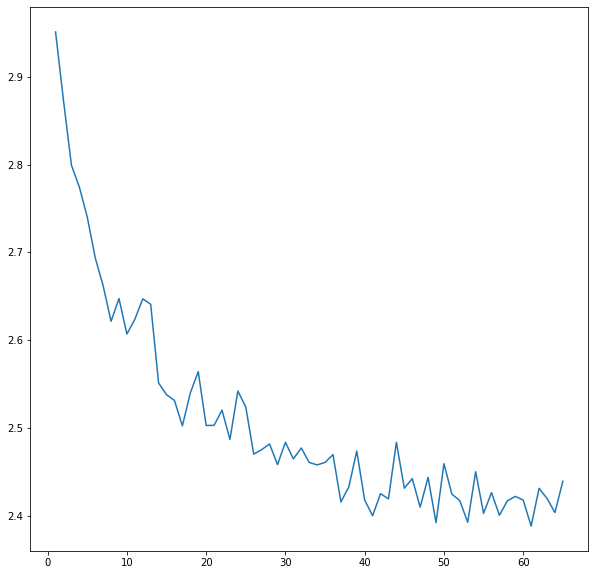

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, len(all_mean_avg[15:]) + 1), all_mean_avg[15:])
plt.show()

In [22]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 170.5018 - mae: 8.1325


[170.50180053710938, 8.132489204406738]